In [2]:
using Eirene
using DelimitedFiles
using PlotlyJS

[ Info: Precompiling Eirene [9c0f25c4-2ca1-5870-89f6-52640788da1d]
┌ Warning: Package Eirene does not have SharedArrays in its dependencies:
│ - If you have Eirene checked out for development and have
│   added SharedArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Eirene
└ Loading SharedArrays into Eirene from project dependency, future warnings for Eirene are suppressed.


WebIO._IJuliaInit()

In [12]:

file = "torus_points_2.csv"
folder = "C:/Users/jevin/Documents/Documents/Education/Self-Learning/Persistant Homology/PHAML/data/torus/"
file_path = folder * file
sphere_pc = readdlm(file_path, ',')

3×500 Matrix{Float64}:
  2.12046    1.00014    0.397032  -0.838947  …  2.50589    1.4491   -2.19287
  1.1083    -1.00439   -2.25565    0.654614     1.23087    1.19051   0.036944
 -0.919697   0.812769   0.956926  -0.352319     0.610697  -0.99221  -0.981163

In [13]:
PH = eirene(sphere_pc, maxdim=1, model="pc")


Dict{String, Any} with 12 entries:
  "symmat"   => [99286 99031 … 4605 3699; 99031 99286 … 2160 1568; … ; 4605 216…
  "maxnz"    => [0, 18125, 1435181, 1, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  492, 493, 494, 495, 496, 49…
  "cyclerep" => [Vector{Int64}[], [[1, 2], [3, 4], [29, 27], [18, 21], [17, 20]…
  "phi"      => [Int64[], [1, 996, 12574, 8308, 7828, 18128, 17697, 18122, 4106…
  "plo"      => [Int64[], [2, 4, 27, 21, 20, 49, 38, 43, 106, 475  …  44, 341, …
  "ocg2rad"  => [3.97778, 3.97777, 3.9777, 3.97766, 3.97765, 3.97764, 3.97761, …
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  491, 492, 493, 494, 495, 49…
  "nvl2ovl"  => [408, 452, 391, 335, 479, 199, 433, 442, 205, 461  …  251, 340,…
  "input"    => Dict{String, Any}("genera"=>[2.12046 1.00014 … 1.4491 -2.19287;…
  "tid"      => [Int64[], [2, 4, 27, 21, 20, 49, 38, 43, 106, 475  …  341, 497,…
  "grain"    => [[99286, 99286, 99286, 99286, 99286, 99286, 99286, 99286, 99286…

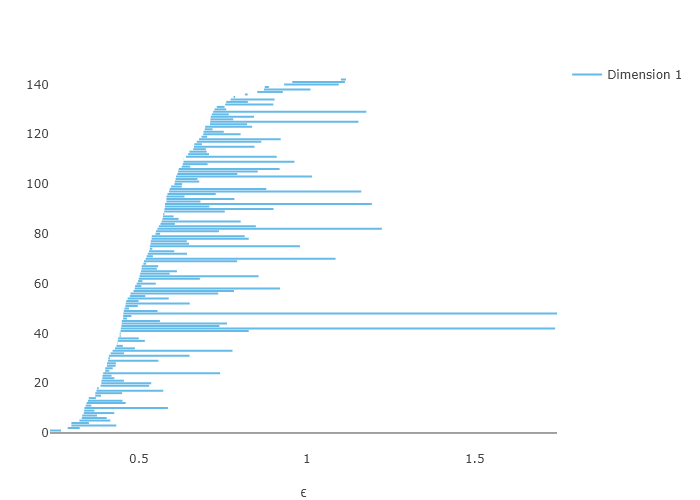

In [14]:
plotbarcode_pjs(PH, dim=1)

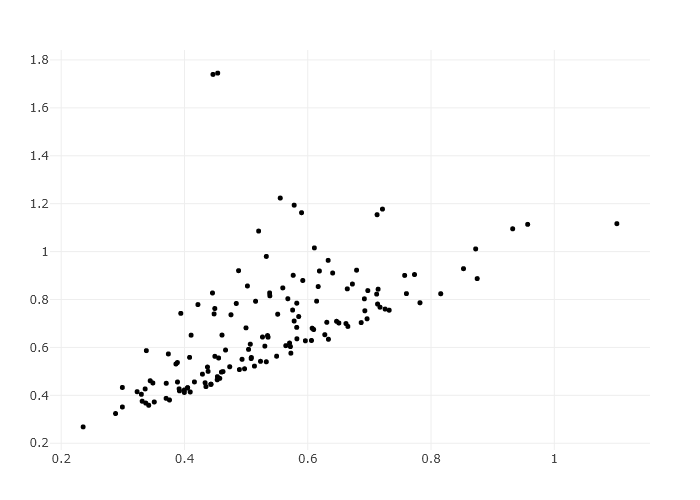

In [15]:
plotpersistencediagram_pjs(PH, dim=1)

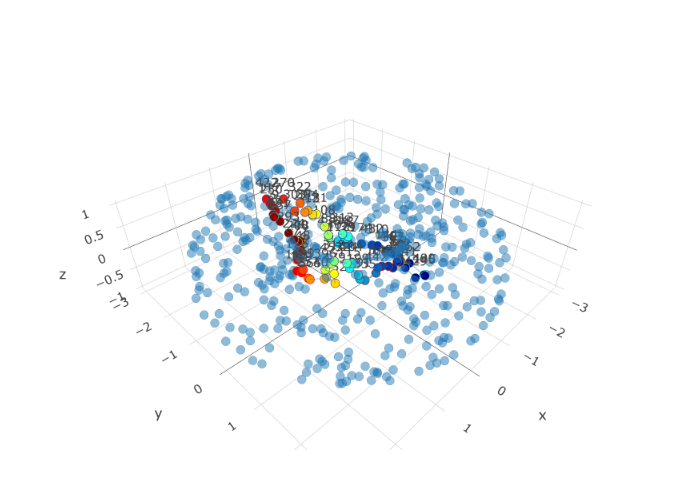

In [16]:
plotclassrep_pjs(PH,dim=1,class=139)

In [18]:
PD = barcode(PH)

142×2 Matrix{Float64}:
 0.288171  0.324043
 0.299225  0.351282
 0.32314   0.415127
 0.37042   0.450234
 0.391852  0.418744
 0.399757  0.411946
 0.399889  0.422349
 0.40516   0.431866
 0.433423  0.452408
 0.43832   0.49994
 0.442966  0.446306
 0.453126  0.464928
 0.45348   0.477916
 ⋮         
 0.475432  0.736279
 0.484053  0.783388
 0.502134  0.856444
 0.532801  0.97987
 0.538484  0.815369
 0.576422  0.901071
 0.577972  1.19373
 0.610747  1.01541
 0.453905  1.74496
 0.487758  0.920325
 0.555381  1.22355
 0.446284  1.73952

In [6]:
# A = [b[2] - b[1] for b in PD if isfinite(b[2])]
birth, death = PD[1,1], PD[1,2]
println(death - birth)


0.00777945098850058


In [19]:
# Computing Persistent Lifetimes
N = size(PD, 1)
# We can't use the ones that are infinite
P_lifetimes = [PD[i, 2] - PD[i, 1] for i in 1:N if isfinite(PD[i, 2])]

142-element Vector{Float64}:
 0.035871996618188406
 0.05205756763587349
 0.09198689640972446
 0.07981380044722686
 0.026892409863993882
 0.012189164718735546
 0.022460348366394878
 0.026705452608958846
 0.01898506657840704
 0.06161957512151278
 0.003339832968808243
 0.011801434751835815
 0.024436100511542824
 ⋮
 0.26084764536011856
 0.2993351670943157
 0.3543101356090561
 0.4470691500499929
 0.2768846693635746
 0.3246492779296716
 0.6157618960867428
 0.4046594281652839
 1.2910580289461988
 0.4325667459966313
 0.6681669733848149
 1.2932369176187581

In [63]:
writedlm("topological_descriptors.csv", P_lifetimes, ',')
writedlm("persistence_diagram.csv", PD, ',')

In [20]:
using Statistics

# Compute persistence statistics
mean_lifetime = mean(P_lifetimes)      # Mean lifetime
std_lifetime = std(P_lifetimes)        # Standard deviation
max_lifetime = maximum(P_lifetimes)    # Longest-lived feature
sum_lifetime = sum(P_lifetimes)        # Total persistence sum

# Store as a feature vector
stat_features = [mean_lifetime, std_lifetime, max_lifetime, sum_lifetime]

# Save to CSV for ML training
writedlm("t2_persistence_statistics.csv", permutedims(stat_features), ',')
